In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.util as util
from src.p01b_logreg import LogisticRegression
from src.p01e_gda import GDA
import seaborn as sns

from sklearn.metrics import accuracy_score

from pythetatools.config_visualisation import t2k_style
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds1_train = pd.read_csv("data/ds1_train.csv")
ds1_valid = pd.read_csv("data/ds1_valid.csv")
ds2_train = pd.read_csv("data/ds2_train.csv")
ds2_valid = pd.read_csv("data/ds2_valid.csv")

Accuracy=0.915


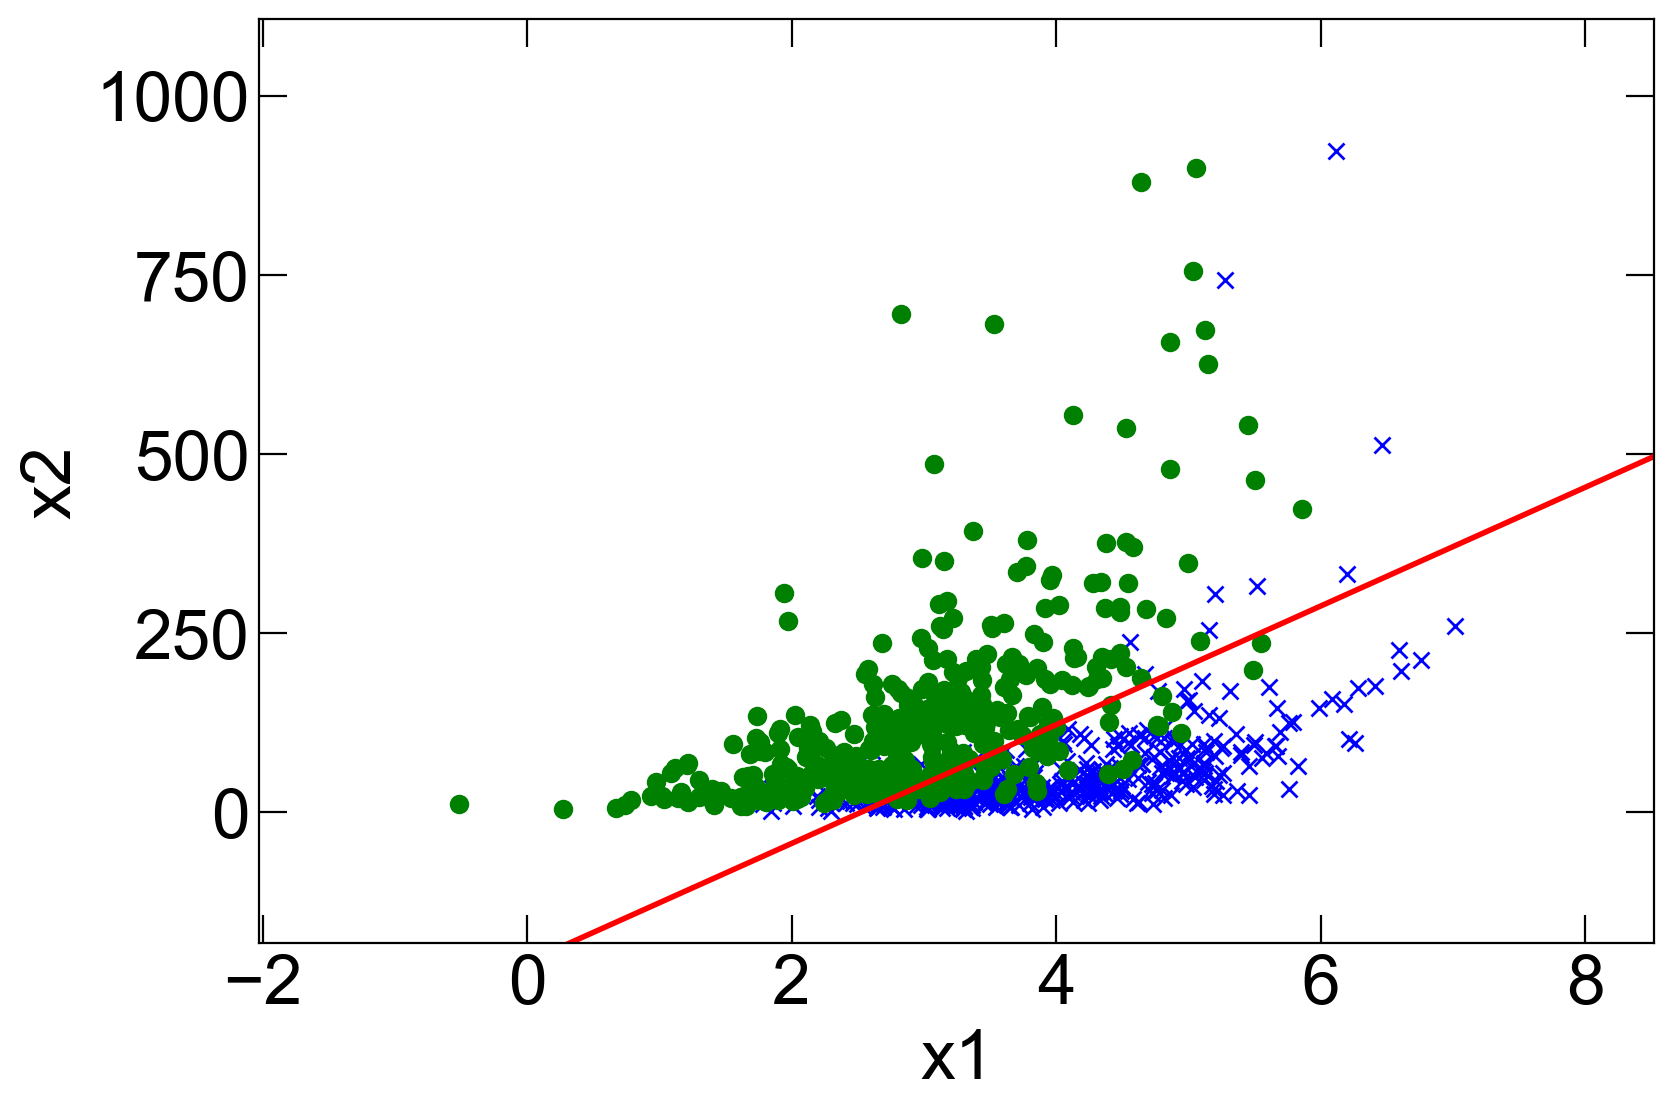

In [73]:
x_train, y_train = util.load_dataset("data/ds1_train.csv", add_intercept=True)
x_valid, y_valid = util.load_dataset("data/ds1_valid.csv", add_intercept=True)

logreg_1 = LogisticRegression()
logreg_1.fit(x_train, y_train)

theta_bf = logreg_1.theta

util.plot(x_train, y_train, theta_bf)
print(f'Accuracy={accuracy_score(y_train, class_pred)}')

Accuracy=0.915


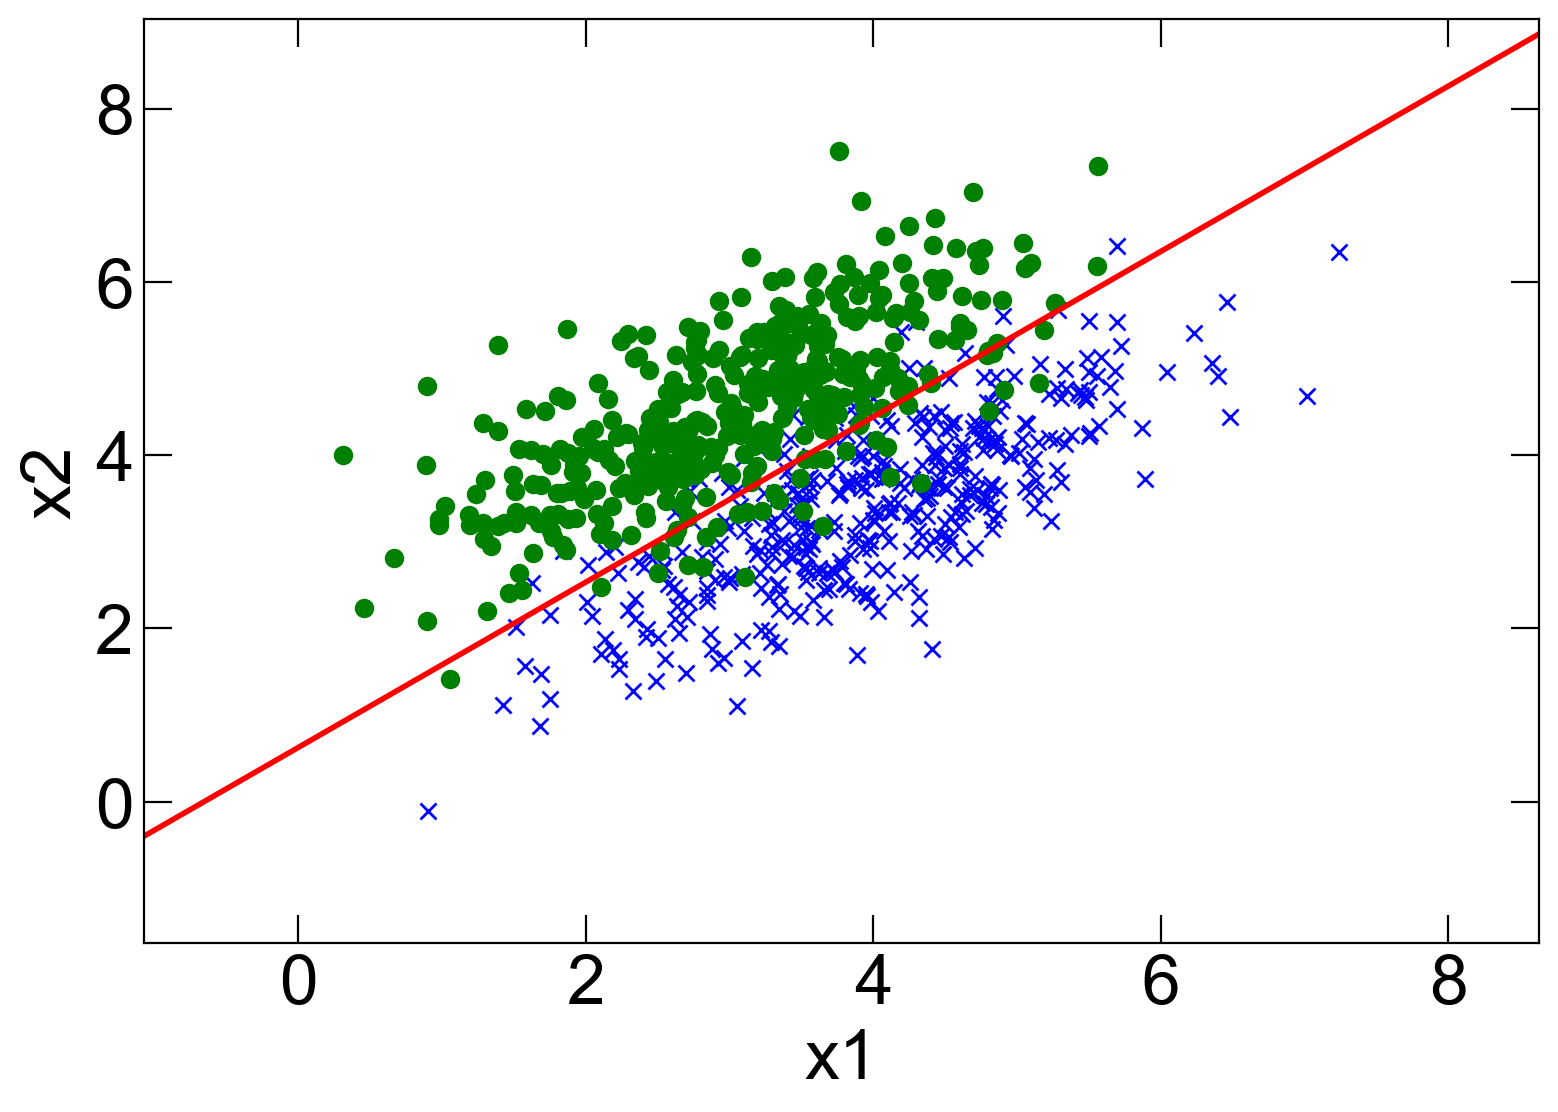

In [74]:
x_train, y_train = util.load_dataset("data/ds2_train.csv", add_intercept=True)
x_valid, y_valid = util.load_dataset("data/ds2_valid.csv", add_intercept=True)
logreg_2 = LogisticRegression()
logreg_2.fit(x_train, y_train)
theta_bf = logreg_2.theta
util.plot(x_train, y_train, theta_bf)

class_pred = (logreg_2.predict(x_train)>0.5).astype(int)
print(f'Accuracy={accuracy_score(y_train, class_pred)}')

Accuracy=0.86625


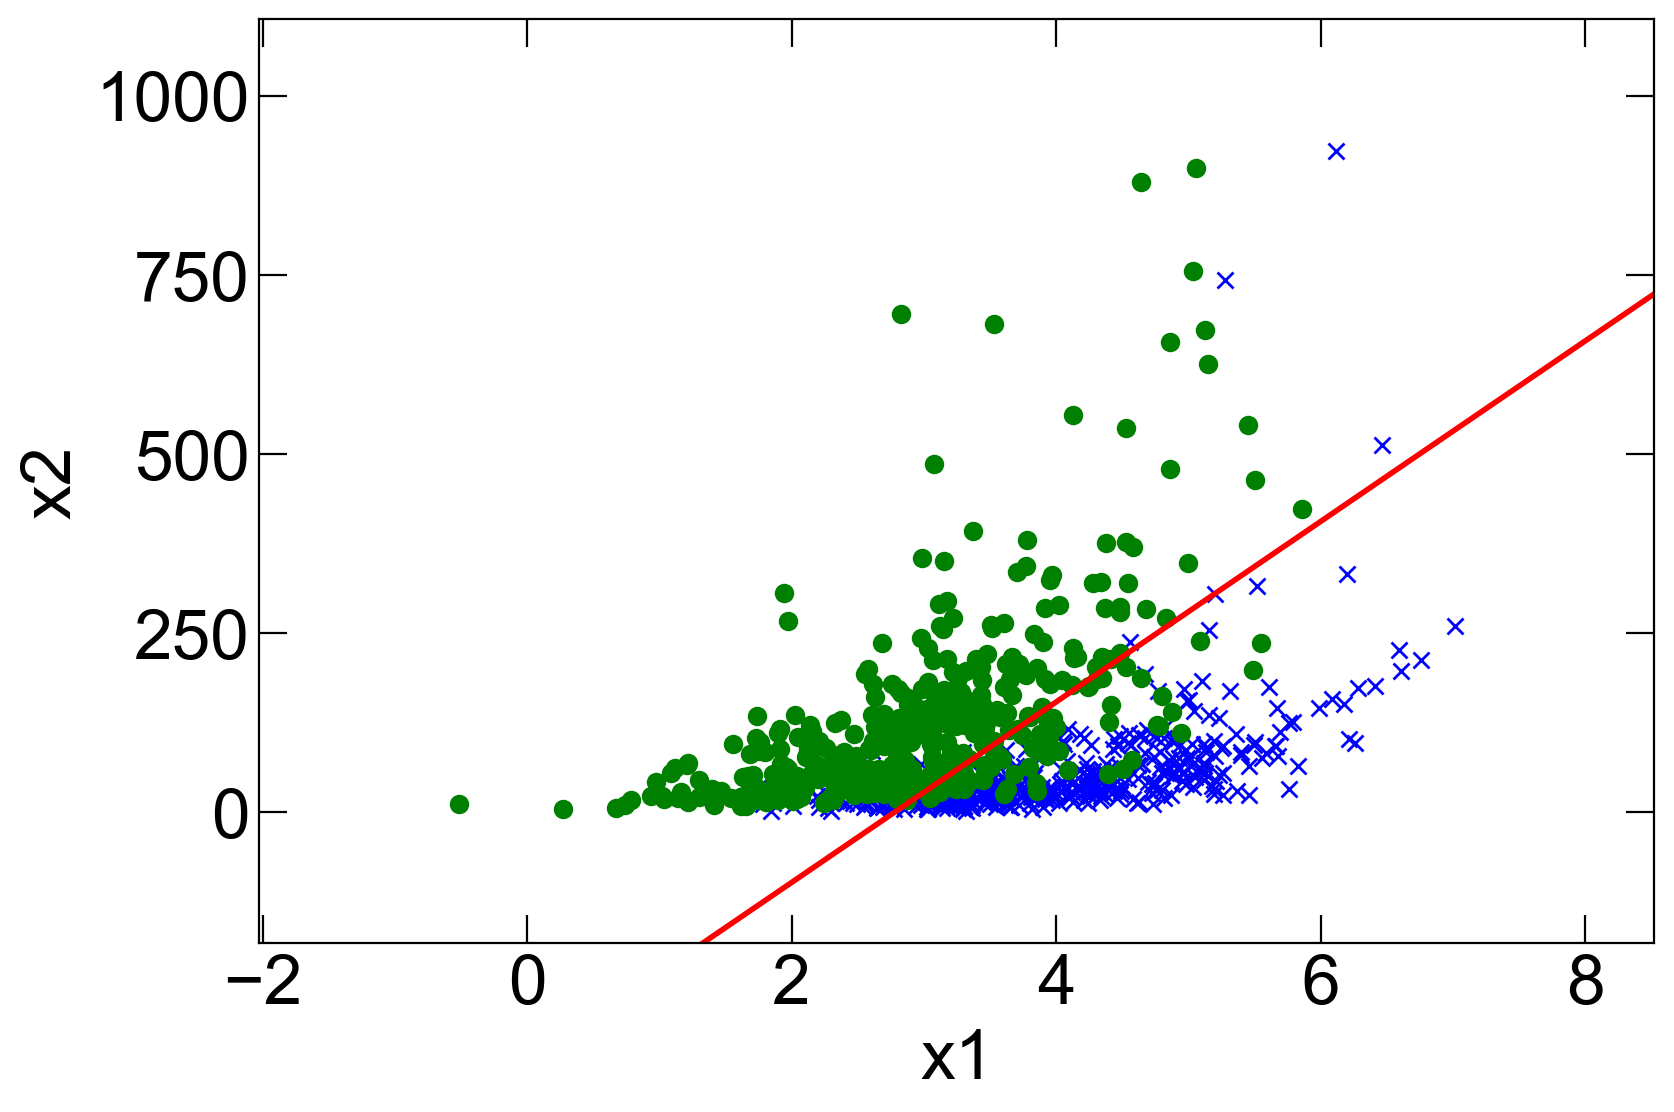

In [149]:
x_train, y_train = util.load_dataset("data/ds1_train.csv", add_intercept=False)
x_valid, y_valid = util.load_dataset("data/ds1_valid.csv", add_intercept=False)

gda_1 = GDA()
gda_1.fit(x_train, y_train)

theta_bf = gda_1.theta

util.plot(x_train, y_train, theta_bf)
class_pred = (gda_1.predict(x_train)>0.5).astype(int)

print(f'Accuracy={accuracy_score(y_train, class_pred)}')

Accuracy=0.91375


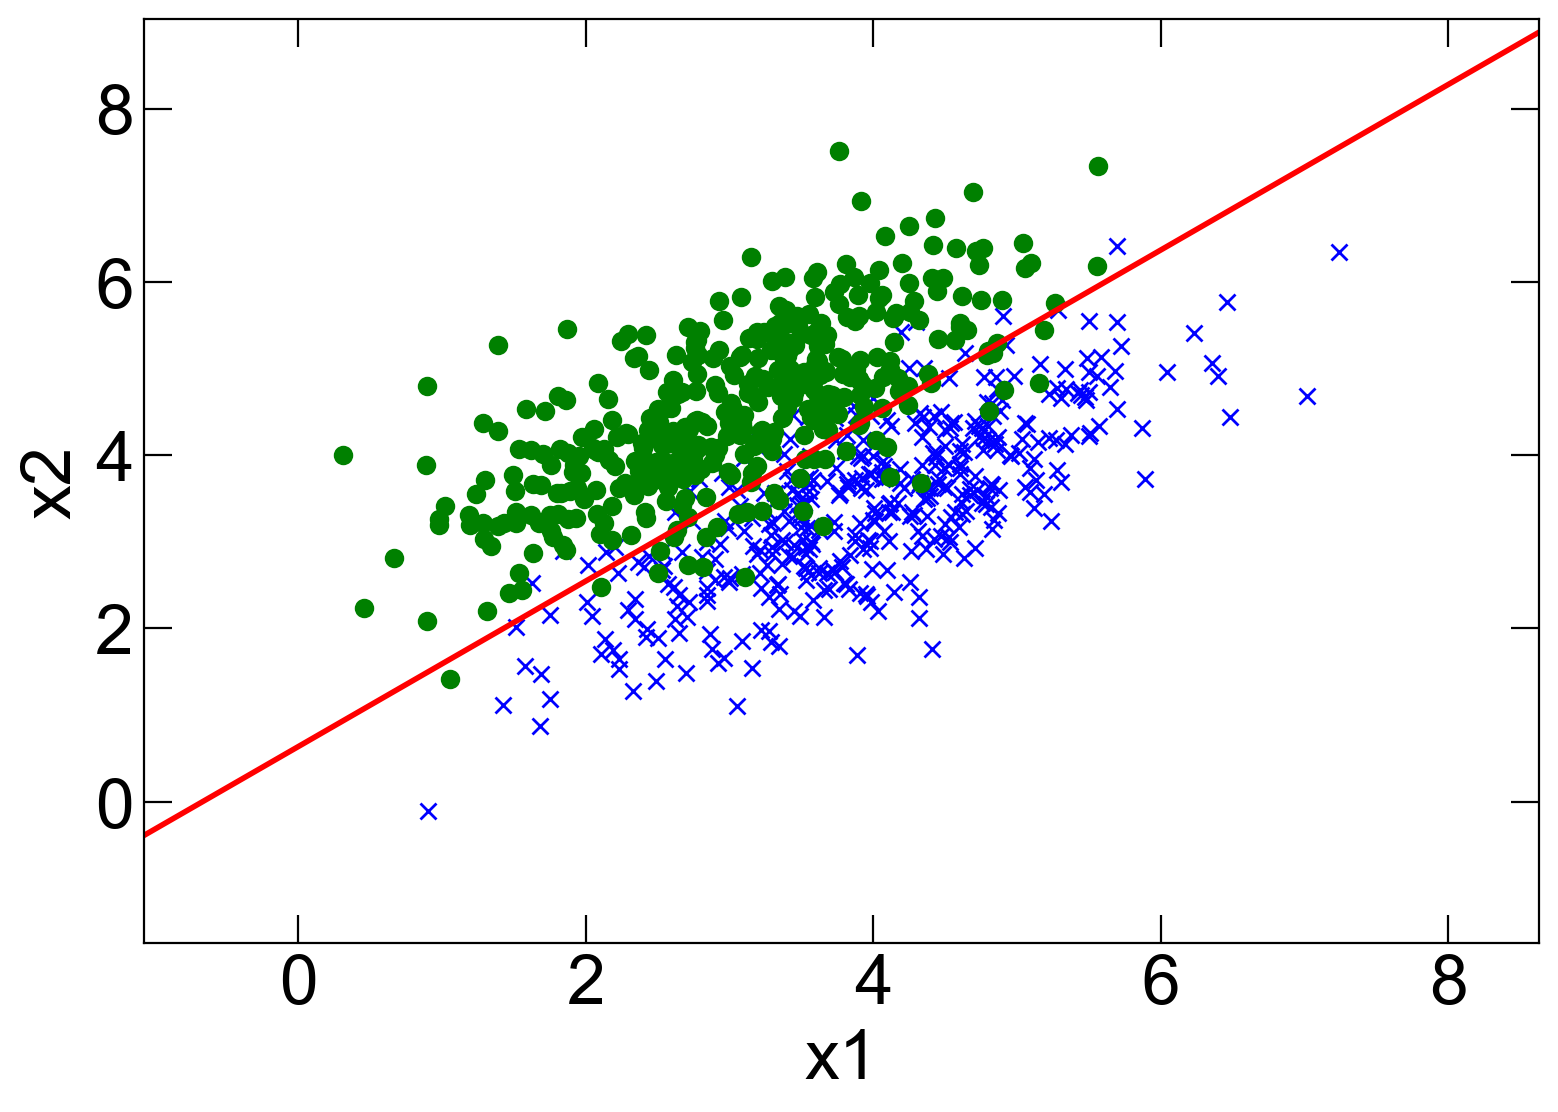

In [150]:
x_train, y_train = util.load_dataset("data/ds2_train.csv", add_intercept=False)
x_valid, y_valid = util.load_dataset("data/ds2_valid.csv", add_intercept=False)

gda_2 = GDA()
gda_2.fit(x_train, y_train)
theta_bf = gda_2.theta

util.plot(x_train, y_train, theta_bf)
class_pred = (gda_2.predict(x_train)>0.5).astype(int)

print(f'Accuracy={accuracy_score(y_train, class_pred)}')

In [104]:
def plot(ax, x=None, y=None, theta=None, color='tab:red', ls='solid', label=None):
    colors = {0: 'tab:blue', 1: 'tab:orange'}
    markers = {0: 's', 1: '^'}
    
    if y is not None:
        cls = np.unique(y)
        for cl in cls:
            mask = (y==cl)
            ax.scatter(x[mask, 0], x[mask, 1], color=colors[cl], marker=markers[cl])

    if theta is not None:
        x = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
        ax.plot(x, -theta[0]/theta[2] - theta[1]/theta[2]*x, color=color, ls=ls, label=label)

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.legend()

Dataset1
Accuracy for logistic regression: 0.9
Accuracy for logistic regression: 0.83


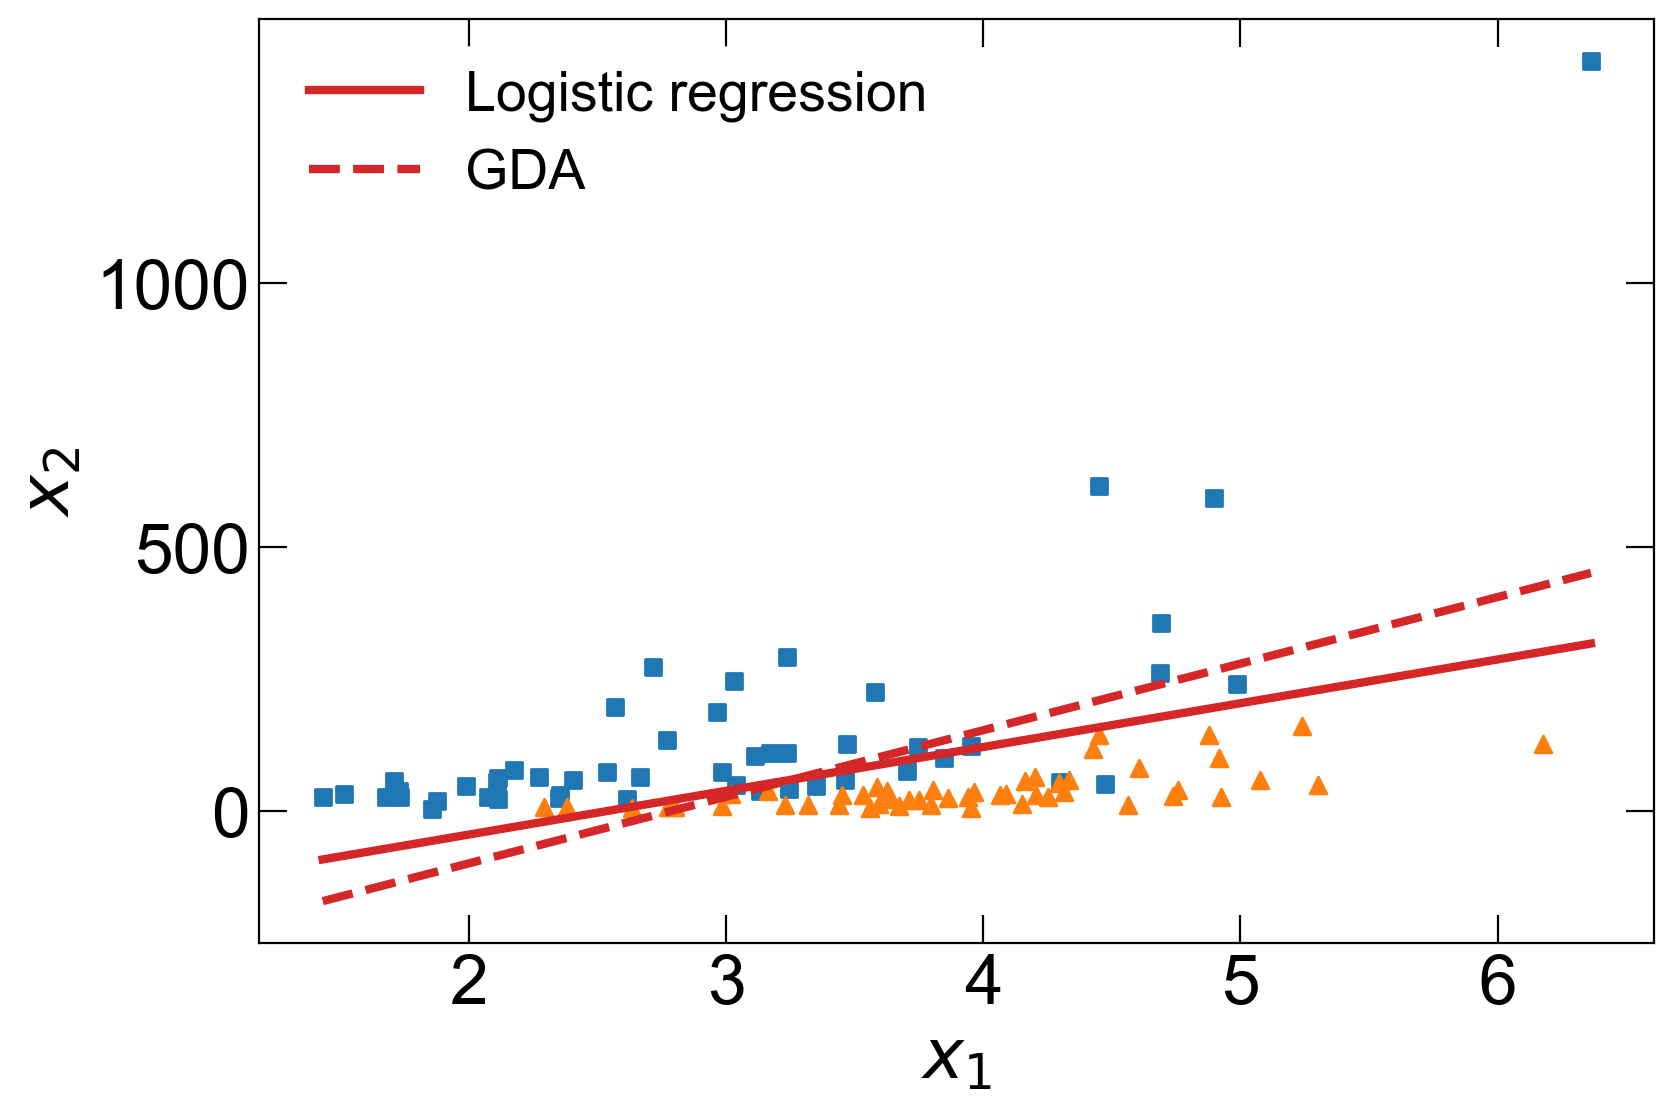

In [111]:
x_valid1, y_valid1 = util.load_dataset("data/ds1_valid.csv", add_intercept=False)
x_valid1_w1, y_valid1_w1 = util.load_dataset("data/ds1_valid.csv", add_intercept=True)

fig, ax = plt.subplots()
plot(ax, x_valid1, y_valid1, logreg_1.theta, label='Logistic regression')
plot(ax, x_valid1, None, gda_1.theta, ls='--', label='GDA')

class_pred = (logreg_1.predict(x_valid1_w1)>0.5).astype(int)
acc_logreg_1 = accuracy_score(y_valid1, class_pred)
class_pred = (gda_1.predict(x_valid1)>0.5).astype(int)
acc_gda_1 = accuracy_score(y_valid1, class_pred)

print('Dataset1')
print(f'Accuracy for logistic regression: {acc_logreg_1}')
print(f'Accuracy for GDA: {acc_gda_1}')

Dataset1
Accuracy for logistic regression: 0.91
Accuracy for GDA: 0.91


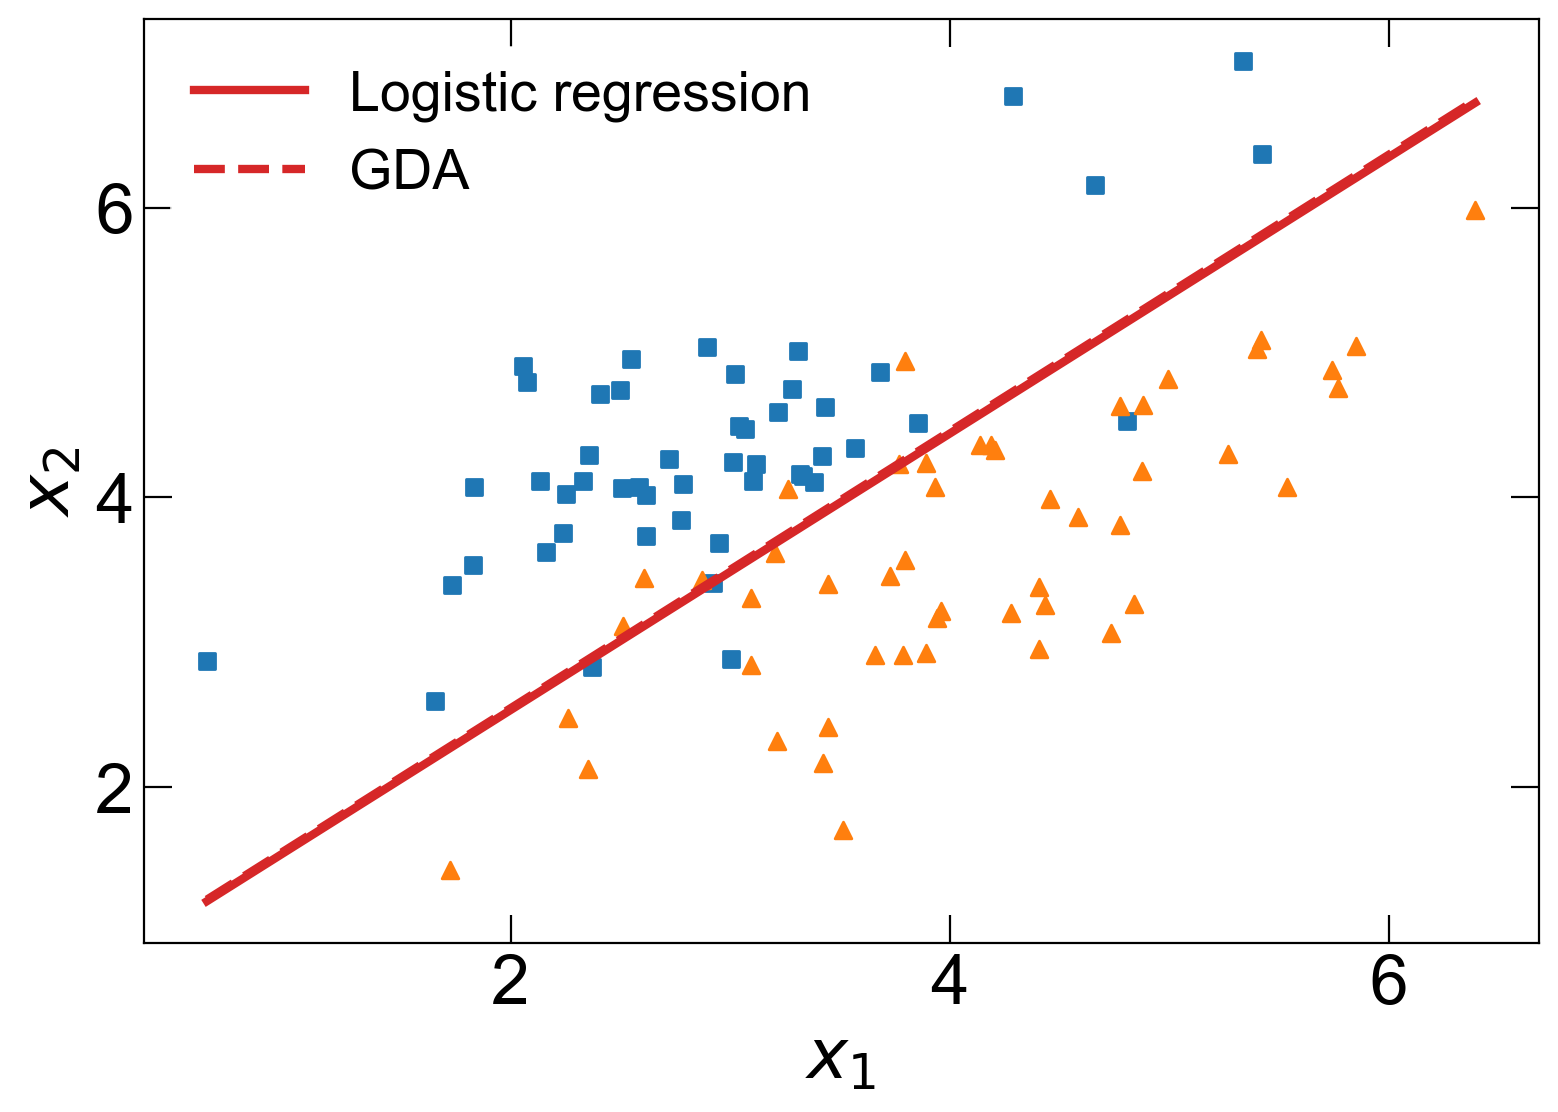

In [113]:
x_valid2, y_valid2 = util.load_dataset("data/ds2_valid.csv", add_intercept=False)
x_valid2_w1, y_valid2_w1 = util.load_dataset("data/ds2_valid.csv", add_intercept=True)

fig, ax = plt.subplots()
plot(ax, x_valid2, y_valid2, logreg_2.theta, label='Logistic regression')
plot(ax, x_valid2, None, gda_2.theta, ls='--', label='GDA')

class_pred = (logreg_2.predict(x_valid2_w1)>0.5).astype(int)
acc_logreg_2 = accuracy_score(y_valid2, class_pred)
class_pred = (gda_2.predict(x_valid2)>0.5).astype(int)
acc_gda_2 = accuracy_score(y_valid2, class_pred)

print('Dataset1')
print(f'Accuracy for logistic regression: {acc_logreg_2}')
print(f'Accuracy for GDA: {acc_gda_2}')

In [116]:
ds2_train

,x_1,x_2,y
0,3.759481,7.507940,0.0
1,3.422057,4.991203,0.0
2,2.778818,4.112071,0.0
3,4.018066,5.653732,0.0
4,1.806062,4.685966,0.0
...,...,...,...
795,4.328355,3.673261,1.0
796,3.167061,2.956635,1.0
797,3.544105,2.649879,1.0
798,2.575461,2.517255,1.0


In [124]:
ds1_train_trans = ds1_train.copy()
ds1_train_trans['x_2'] = np.log(ds1_train['x_2'])

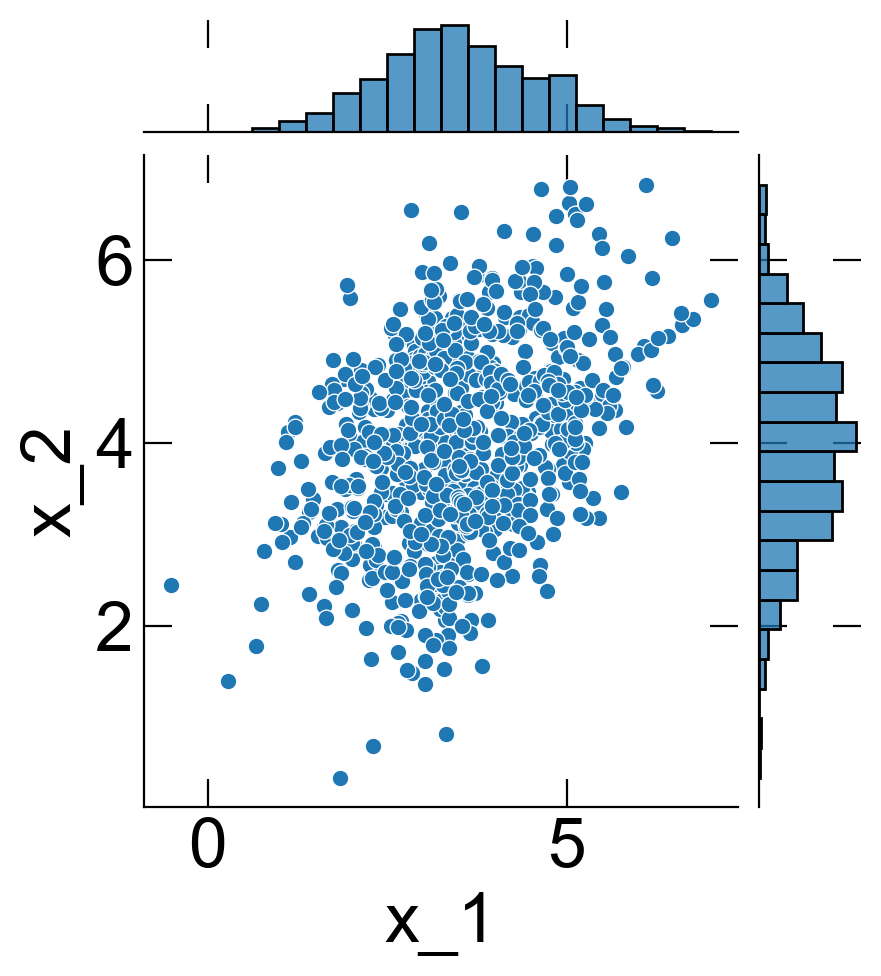

In [125]:
# Joint distribution
sns.jointplot(
    data=ds1_train_trans,
    x='x_1',
    y='x_2',
    kind='scatter',  # or 'kde', 'hex', 'hist'
    height=5,        # overall figure size
    marginal_kws=dict(bins=20, fill=True)
)

In [166]:
def transform(x):
    result = x.copy()
    result[:, -1] = np.log(x[:, -1])
    return result

In [168]:
x_train, y_train = util.load_dataset("data/ds1_train.csv", add_intercept=False)
x_valid, y_valid = util.load_dataset("data/ds1_valid.csv", add_intercept=False)

x_train = transform(x_train)

gda_1_trans = GDA()
gda_1_trans.fit(x_train, y_train)

x_train, y_train = util.load_dataset("data/ds1_train.csv", add_intercept=True)
x_valid, y_valid = util.load_dataset("data/ds1_valid.csv", add_intercept=True)

x_train = transform(x_train)

logreg_1_trans = LogisticRegression()
logreg_1_trans.fit(x_train, y_train)

Dataset1
Accuracy for logistic regression: 0.95
Accuracy for GDA: 0.95


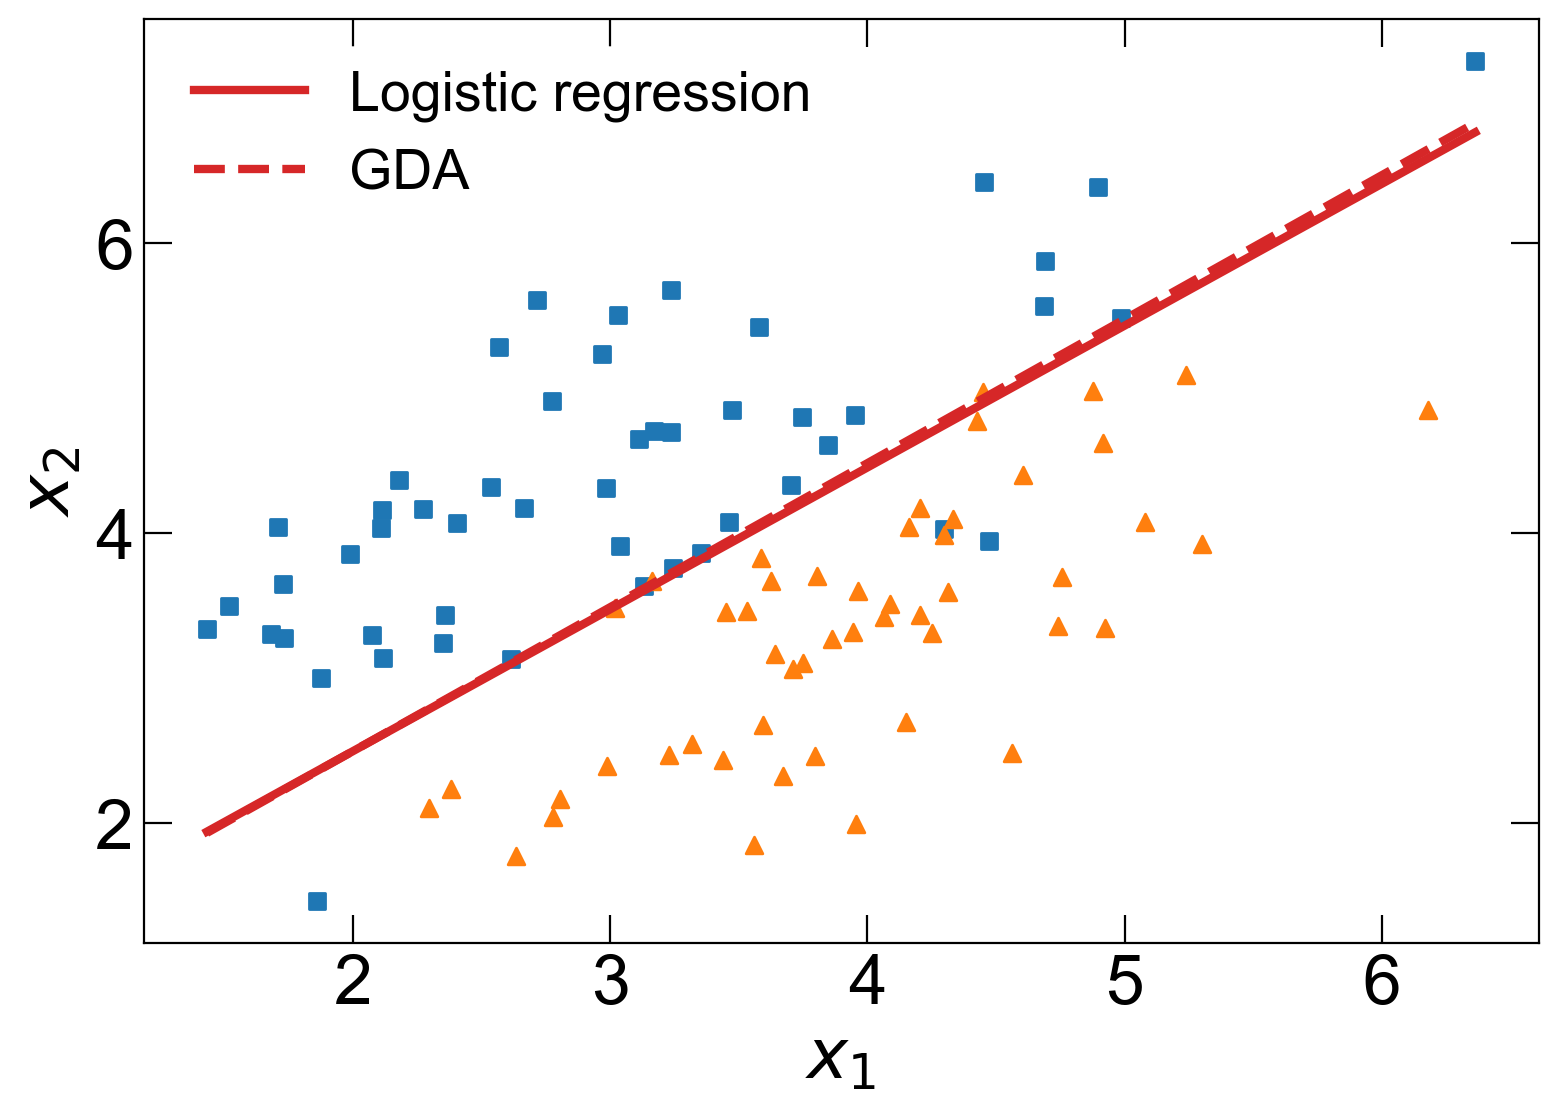

In [170]:
x_valid1, y_valid1 = util.load_dataset("data/ds1_valid.csv", add_intercept=False)
x_valid1_w1, y_valid1_w1 = util.load_dataset("data/ds1_valid.csv", add_intercept=True)

x_valid1_trans = transform(x_valid1)
x_valid1_w1_trans = transform(x_valid1_w1)

fig, ax = plt.subplots()
plot(ax, x_valid1_trans, y_valid1, logreg_1_trans.theta, label='Logistic regression')
plot(ax, x_valid1_trans, None, gda_1_trans.theta, ls='--', label='GDA')

class_pred = (logreg_1_trans.predict(x_valid1_w1_trans)>0.5).astype(int)
acc_logreg_1 = accuracy_score(y_valid1, class_pred)
class_pred = (gda_1_trans.predict(x_valid1_trans)>0.5).astype(int)
acc_gda_1 = accuracy_score(y_valid1, class_pred)

print('Dataset1')
print(f'Accuracy for logistic regression: {acc_logreg_1}')
print(f'Accuracy for GDA: {acc_gda_1}')